In [26]:
from random import Random
from matplotlib.pyplot import figure
SEED = 5

random_gen = Random(x = SEED)
def gen_random(N=1000):
    DATA_X, DATA_Y =[],[]
    for _ in range(N):
        DATA_X.append(random_gen.uniform(a=0, b=1))
    for _ in range(N):
        DATA_Y.append(random_gen.uniform(a=0, b=1))
    return DATA_X, DATA_Y

data_x,data_y = gen_random()

print(data_x[:10])

[0.6229016948897019, 0.7417869892607294, 0.7951935655656966, 0.9424502837770503, 0.7398985747399307, 0.922324996665417, 0.029005228283614737, 0.46562265437810535, 0.9433567169983137, 0.6489745531369242]


In [27]:
from math import sqrt

def loss(x_i, y_i,  x_p =5, y_p=5):
    return 1/len(x_i) * sum([sqrt((x - x_p)**2 + (y - y_p)**2) for x,y in zip(x_i, y_i)])

print(loss(data_x, data_y))

6.382888159785493


[-1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.9299999999999999, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83, -0.8200000000000001, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7, -0.69, -0.6799999999999999, -0.6699999999999999, -0.6599999999999999, -0.6499999999999999, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.5800000000000001, -0.5700000000000001, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5, -0.49, -0.48, -0.47, -0.45999999999999996, -0.44999999999999996, -0.43999999999999995, -0.42999999999999994, -0.42000000000000004, -0.41000000000000003, -0.4, -0.39, -0.38, -0.37, -0.36, -0.35, -0.33999999999999997, -0.32999999999999996, -0.31999999999999995, -0.30999999999999994, -0.29999999999999993, -0.29000000000000004, -0.28, -0.27, -0.26, -0.25, -0.24, -0.22999999999999998, -0.21999999999999997, -0.20999999999999996, -0.19999999999999996, -0.18999999999999995, -0.17999999999999994, -0.16999999999999993, -0.16000000000000003,

C:\Users\Eng Habeba\AppData\Local\Temp\ipykernel_11968\3068319408.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_loss.show()


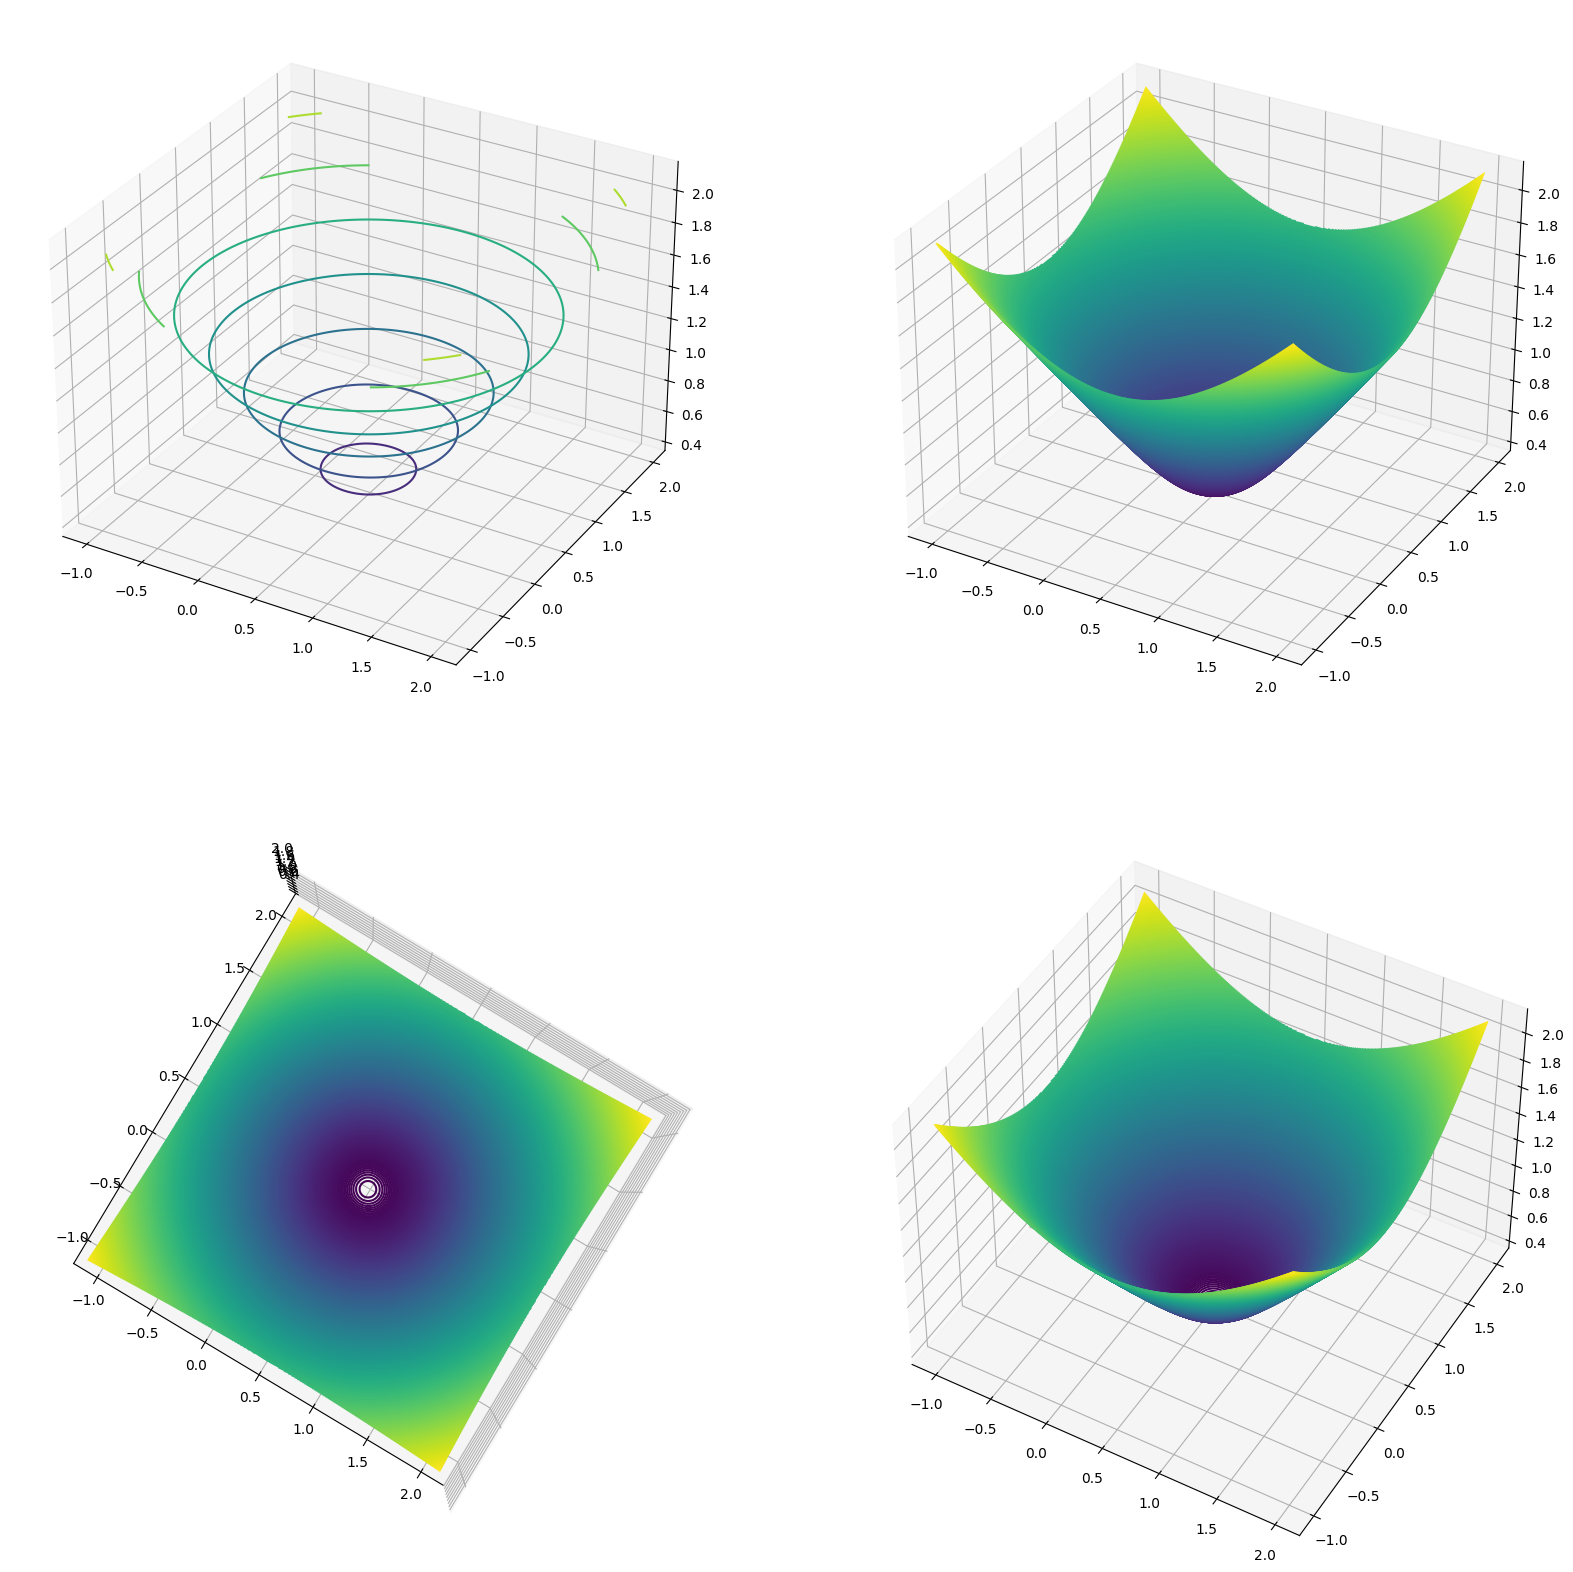

In [54]:
STEP = 0.01
MESH_SIZE = 300

def clc_loss_mesh(x_i, y_i , step = STEP, mesh_size = MESH_SIZE ):
    
    x_mesh = [-1 + i*step for i in range(mesh_size)]
    y_mesh = [-1 + i*step for i in range(mesh_size)]
 

    loss_mesh = [[loss(x_i, y_i, x_curr, y_curr) for x_curr in x_mesh] for y_curr in y_mesh]
    
    return x_mesh, y_mesh, loss_mesh
x_mesh, y_mesh, loss_mesh = clc_loss_mesh(data_x, data_y)

print(x_mesh, y_mesh, loss_mesh)
fig_loss = figure(figsize = (20, 20))
ax_loss = fig_loss.add_subplot(2, 2, 1, projection = "3d")
ax_loss2 = fig_loss.add_subplot(2, 2, 2, projection = "3d")
ax_loss3 = fig_loss.add_subplot(2, 2, 3, projection = "3d")
ax_loss4 = fig_loss.add_subplot(2, 2, 4, projection = "3d")

ax_loss.contour(x_mesh, y_mesh, loss_mesh)
ax_loss2.contour(x_mesh, y_mesh, loss_mesh, levels = 500)
ax_loss3.contour(x_mesh, y_mesh, loss_mesh, levels = 500)
ax_loss4.contour(x_mesh, y_mesh, loss_mesh, levels = 500)

ax_loss3.view_init(elev = 90)
ax_loss4.view_init(elev = 45)

fig_loss.show()

In [28]:
def calc_grad(x_i, y_i, x_p=5, y_p=5):
    x_grad, y_grad = 0,0
    
    for x,y in zip(x_i, y_i):
        x_grad += ((((x-x_p)**2 + (y-y_p)**2)** -0.5) * (x-x_p))/len(x_i)
        y_grad += (((x-x_p)**2 + (y-y_p)**2)** -0.5) * (y-y_p) /len(y_i)
    return -x_grad, -y_grad

x_grad, y_grad = calc_grad(data_x, data_y)
    
print(x_grad, y_grad)

0.7063740168102 0.7063243377191616


In [29]:

EPOCHS = 100
DELTA = 1e-2
def grad_losses(x_i, y_i, epochs = EPOCHS, delta = DELTA, x_p_gd = 5, y_p_gd = 5):
    
    losses = []
    
    
    for _ in range(epochs):
         
        x_grad, y_grad = calc_grad(x_i = x_i, y_i = y_i,
                                        x_p = x_p_gd, y_p = y_p_gd)
        x_p_gd -= delta * x_grad
        y_p_gd -= delta * y_grad
        
        losses.append(loss(x_i, y_i, x_p = x_p_gd, y_p = y_p_gd))
        
        
    return x_p_gd, y_p_gd, losses

x_p_grd, y_p_grd, losses = grad_losses(data_x,data_y)
print(x_p_grd, y_p_grd)



4.293768415487777 4.293810990464546


In [30]:
from math import ceil

EPOCHS = 100
DELTA = 1e-2
BATCH_SIZE = 4

def stoch_grad_losses(x_i, y_i, epochs, batch_size, delta, x_p_sgd = 0.3, y_p_sgd = 0.3):
  
    sampler = Random(x = SEED)
    n = len(x_i)
    indices = [i for i in range(len(x_i))]
    num_batches = ceil(n / batch_size)
    losses = []

  # Iterate over the entire dataset for the specified number of epochs
    for _ in range(epochs):
  
        sampler.shuffle(indices)

    # Iterate over each mini-batch of examples
        for batch_index in range(num_batches):
            batch_indices = indices[batch_index * batch_size
                                  : (batch_index + 1) * batch_size]
            batch_x = [x_i[i] for i in batch_indices]
            batch_y = [y_i[i] for i in batch_indices]

            # Compute the gradients using the current parameter values
            grad_x, grad_y = calc_grad(x_i = batch_x, y_i = batch_y,
                                     x_p = x_p_sgd, y_p = y_p_sgd)

            # Update the parameter values using the computed gradients
            x_p_sgd -= delta * grad_x
            y_p_sgd -= delta * grad_y

            # Compute the loss using the updated parameter values
            losses.append(loss(x_i = x_i, y_i = y_i,
                             x_p = x_p_sgd, y_p = y_p_sgd))

  # Return final parameter values and list of losses
    return x_p_sgd, y_p_sgd, losses
x_p_sgd, y_p_sgd, losses = stoch_grad_losses(data_x, data_y, EPOCHS, BATCH_SIZE, DELTA)
print(x_p_sgd, y_p_sgd)



0.4847513277108123 0.463966921878374


In [37]:
import torch 
data_torch = torch.tensor([data_x, data_y])
print(f"before transpose: {data_torch.shape} & ptr : {data_torch.data_ptr()}")
data_torch = data_torch.t()
print(f"after transpode{data_torch.shape}& ptr : {data_torch.data_ptr()}")
data_torch = data_torch.broadcast_to(100,1000,2)
print(f"after broadcasting{data_torch.shape}& ptr : {data_torch.data_ptr()}")
print(f"stride(0): {data_torch.stride(0)} & stride(1): {data_torch.stride(1)} &stride(2): {data_torch.stride(2)}")


before transpose: torch.Size([2, 1000]) & ptr : 2053287560320
after transpodetorch.Size([1000, 2])& ptr : 2053287560320
after broadcastingtorch.Size([100, 1000, 2])& ptr : 2053287560320
stride(0): 0 & stride(1): 1 &stride(2): 1000


In [43]:
data_torch = torch.tensor([data_x, data_y]).t()
x_p, y_p = 5, 5
pnt = torch.tensor([x_p, y_p])
# res = (torch.sqrt(((data_torch - pnt) **2)).sum(dim = 1)).sum(dim = 0)/len(data_x)


result = ((data_torch - pnt) **2).sum(1)
result = torch.sqrt (result)
result = result.sum(dim = 0)
result = result / data_torch.shape[0]

print(result)


tensor(6.3829)


In [61]:
MESH_SIZE = 300
STEP = 0.01


torch_loss_fun = lambda pnt, data: torch.sqrt(((data - pnt)**2).sum(dim = 1)).sum(dim = 0) / data.shape[0]
def calc_mesh_loss(data, step, mesh_size):
    x_mesh =[-1 + i*step for i in range(mesh_size)]
    y_mesh =[-1 + i*step for i in range(mesh_size)]

    loss_mesh = [
        [torch_loss_fun(torch.tensor([x_curr, y_curr]), data) for x_curr in x_mesh] 
        for y_curr in y_mesh 
    ]
    return x_mesh, y_mesh, loss_mesh

x_torch_mesh, y_torch_mesh, loss_torch_mesh = calc_mesh_loss(data = data_torch, step= STEP, mesh_size= MESH_SIZE)
print(torch_loss_fun(torch.tensor([5, 5]), data_torch))

tensor(6.3829)


C:\Users\Eng Habeba\AppData\Local\Temp\ipykernel_11968\3230799980.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_loss.show()


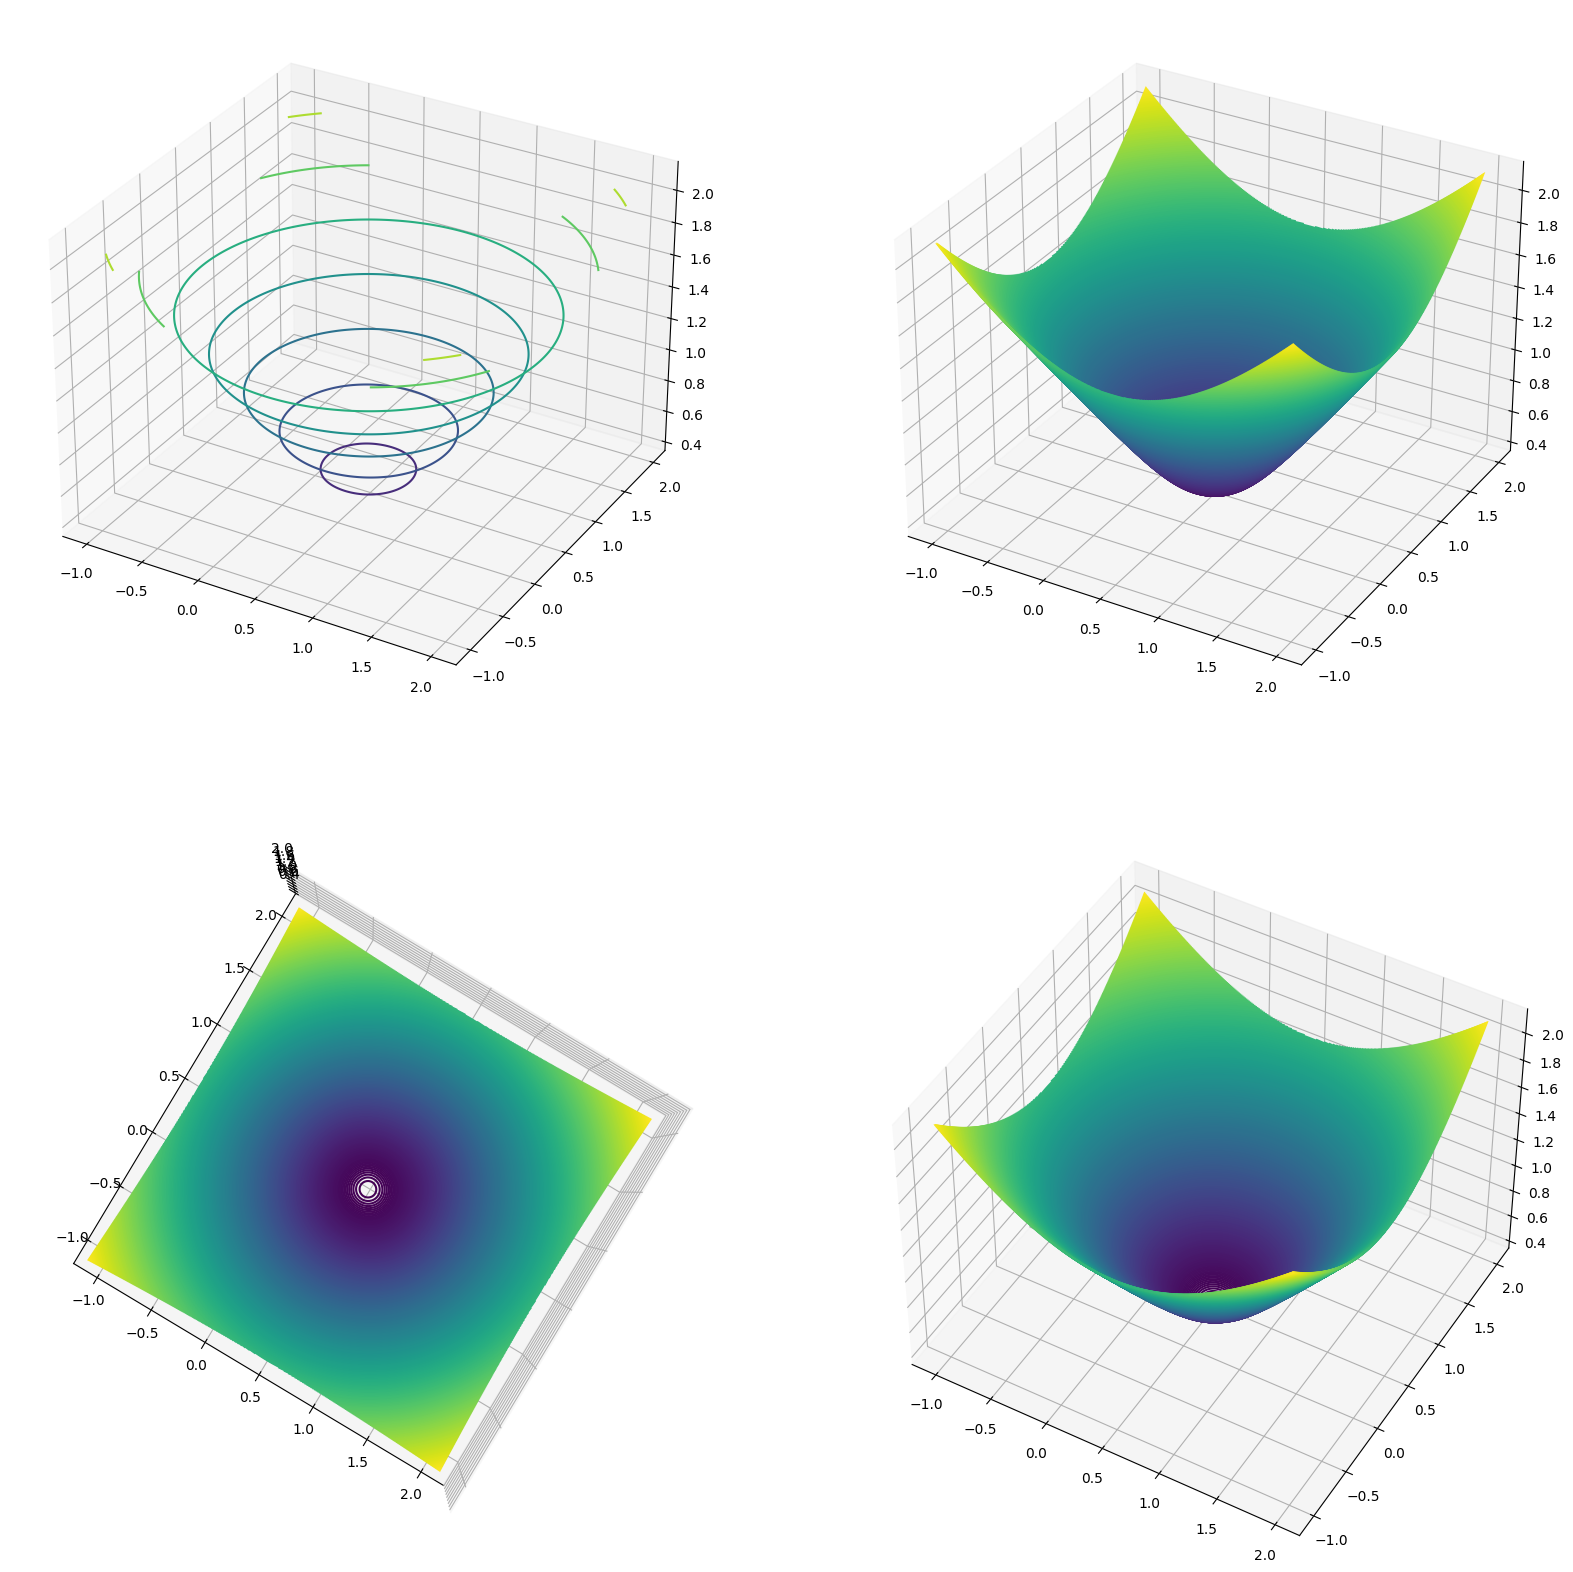

In [62]:
fig_loss = figure(figsize = (20, 20))
ax_loss = fig_loss.add_subplot(2, 2, 1, projection = "3d")
ax_loss2 = fig_loss.add_subplot(2, 2, 2, projection = "3d")
ax_loss3 = fig_loss.add_subplot(2, 2, 3, projection = "3d")
ax_loss4 = fig_loss.add_subplot(2, 2, 4, projection = "3d")

ax_loss.contour(x_torch_mesh, y_torch_mesh, loss_torch_mesh)
ax_loss2.contour(x_torch_mesh, y_torch_mesh, loss_torch_mesh, levels = 500)
ax_loss3.contour(x_torch_mesh, y_torch_mesh, loss_torch_mesh, levels = 500)
ax_loss4.contour(x_torch_mesh, y_torch_mesh, loss_torch_mesh, levels = 500)

ax_loss3.view_init(elev = 90)
ax_loss4.view_init(elev = 45)

fig_loss.show()